In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_2 import *
from linUCB_1 import *
import seaborn as sns

In [2]:
dataExt3 = pd.read_csv('DataExtra/game3.csv')
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1

In [3]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64

DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [4]:
Test_ID_big = 3301
Test_ID_big2 = 3582
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print("2 Arms data shape:", DataDef.shape)
print("4 Arms data shape:", DataDef2.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)

2 Arms data shape: (743103, 30)
4 Arms data shape: (289806, 30)


In [5]:
Actual_Dataset = DataDef_cat.sample(n=20000, random_state=35)
Actual_Dataset2 = DataDef_cat2.sample(n=50000, random_state=13)

# Time played metric as reward

### 2 Arms experiment

#### Day 1

In [6]:
Reward = "time_played_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results1, Paths_Best1, Aligns_Best1, Mean_Reward_Best1, Mean_RewardArms_Best1, Mark_Best1, Feat_Best1, Times_ArmChosen1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  0%|▏                                                                             | 43/20000 [00:00<00:46, 426.11it/s]

Score to beat: 106.01733573357286
Parameters for following model:
	Reward: time_played_d1
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 0.5


  1%|▌                                                                            | 154/20000 [00:00<00:25, 770.53it/s]

	Algorithm result is: 106.86857246319605
	Score to beat is: 106.01733573357286
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 1


  0%|▎                                                                             | 78/20000 [00:00<00:25, 779.31it/s]

	Algorithm result is: 106.30031649373436
	Score to beat is: 106.01733573357286
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 1.5


  0%|▎                                                                             | 88/20000 [00:00<00:22, 879.69it/s]

	Algorithm result is: 105.40589492846456
	Score to beat is: 106.01733573357286
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 2


  0%|▎                                                                             | 85/20000 [00:00<00:23, 849.61it/s]

	Algorithm result is: 104.69238709547423
	Score to beat is: 106.01733573357286
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 2.3581015157406195


  0%|▎                                                                             | 85/20000 [00:00<00:23, 849.33it/s]

	Algorithm result is: 106.87170847475475
	Score to beat is: 106.01733573357286
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 2.480207187300798


  0%|▎                                                                             | 80/20000 [00:00<00:25, 791.79it/s]

	Algorithm result is: 106.46240369627294
	Score to beat is: 106.01733573357286
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 3


  0%|▎                                                                             | 85/20000 [00:00<00:23, 849.29it/s]

	Algorithm result is: 105.80443127992346
	Score to beat is: 106.01733573357286
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:25<00:00, 783.90it/s]

	Algorithm result is: 106.53664472383869
	Score to beat is: 106.01733573357286


In [7]:
Results1

[106.86857246319605,
 106.30031649373436,
 105.40589492846456,
 104.69238709547423,
 106.87170847475475,
 106.46240369627294,
 105.80443127992346,
 106.53664472383869]

In [8]:
print("Best alpha is:", Alphas[Results1.index(np.max(Results1))])
Alpha = Alphas[Results1.index(np.max(Results1))]

Best alpha is: 2.3581015157406195


In [9]:
Mean_Reward_Best1

[107.11381148092629,
 107.862955700124,
 108.47694149478289,
 103.65306320993983,
 105.73277065247969,
 108.17107901023466,
 106.56160756649663,
 107.40143868305407]

In [10]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

105.09732954202316
106.94770402221243


In [11]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1))

Score to beat: 106.01733573357286
Algorithm score: 106.87170847475475


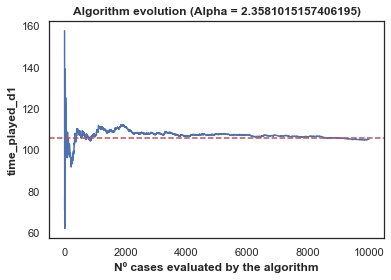

In [13]:
Plot_AlignRewards(Aligns_Best1, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

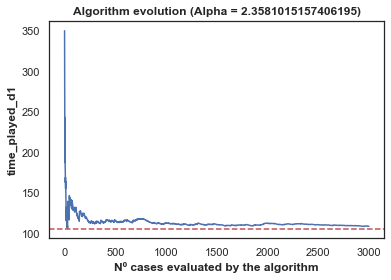

In [16]:
Plot_AlignRewards(Aligns_Best1, 2, Reward, Alpha, N = 3000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

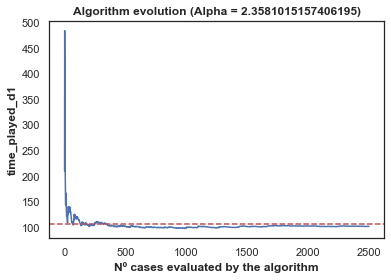

In [19]:
Plot_AlignRewards(Aligns_Best1, 4, Reward, Alpha, N = 2500)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

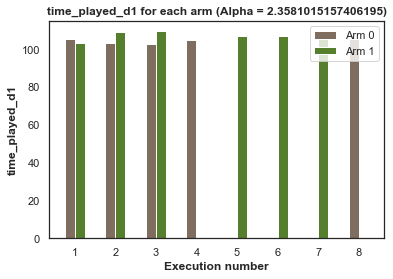

In [20]:
PerformanceArm2(Mean_RewardArms_Best1, Alpha, Reward)

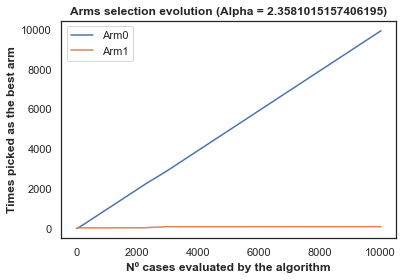

In [22]:
Plot_ArmsSelection(Paths_Best1, 0, Alpha)

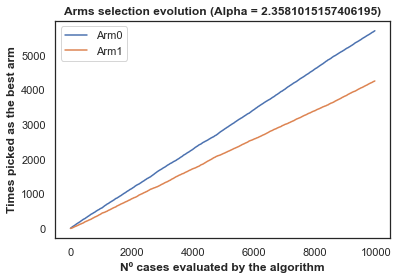

In [23]:
Plot_ArmsSelection(Paths_Best1, 2, Alpha)

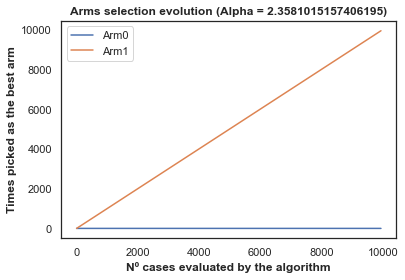

In [24]:
Plot_ArmsSelection(Paths_Best1, 4, Alpha)

Times each arm is chosen: [5185.125 4804.375]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 17.478725907466774
Proportion source_alias_source2 equals 0 for arm 1 is: 24.915526659215182


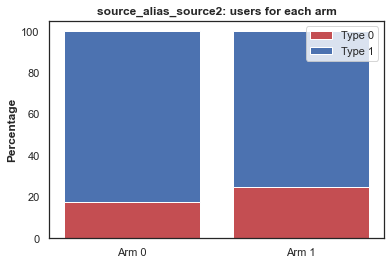

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 82.53031036424092
Proportion platform_alias_platform2 equals 0 for arm 1 is: 70.99068121985927


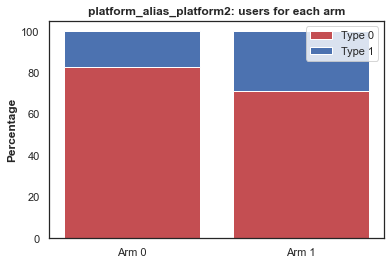

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64



TypeError: reduction operation 'argmax' not allowed for this dtype

In [25]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1, Feat_Best1)

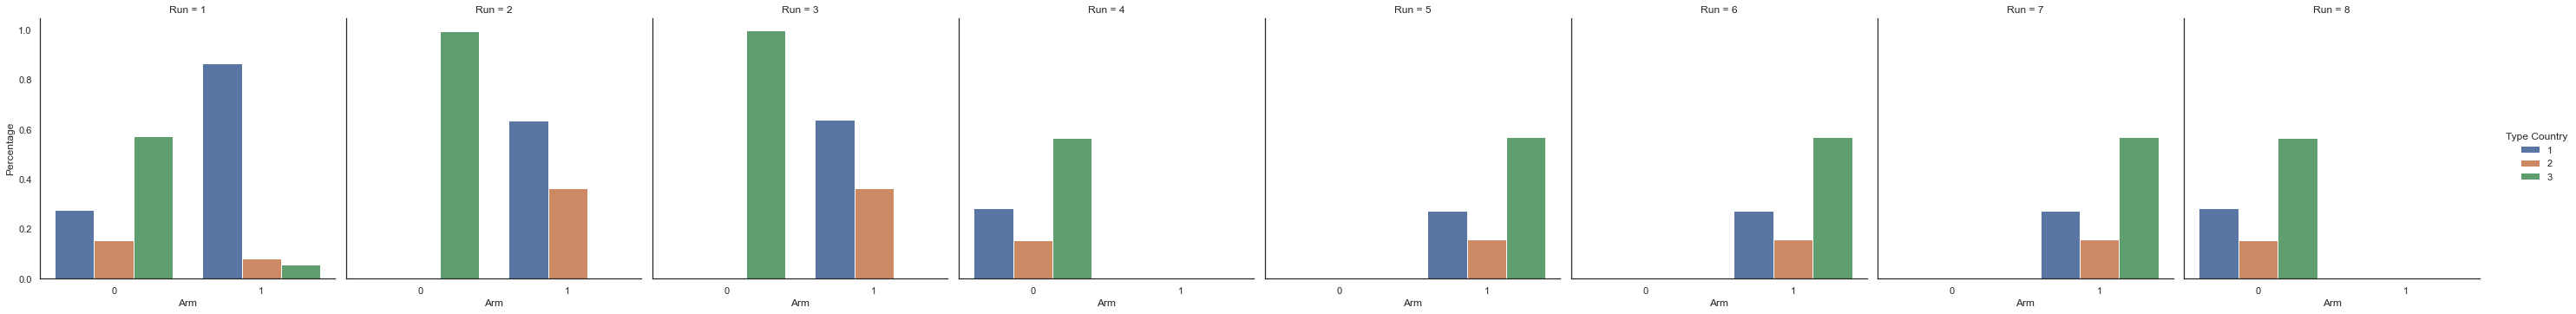

In [26]:
Country_8Runs(Feat_Best1)

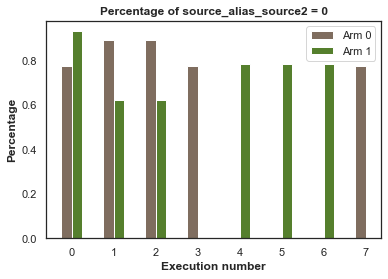

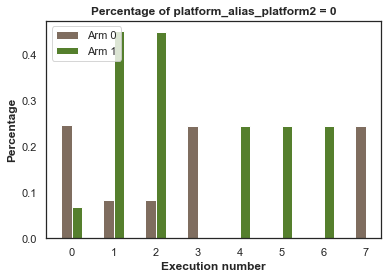

In [27]:
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "platform_alias_platform2")

#### Day 3

In [28]:
Reward = "time_played_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results3, Paths_Best3, Aligns_Best3, Mean_Reward_Best3, Mean_RewardArms_Best3, Mark_Best3, Feat_Best3, Times_ArmChosen3 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  1%|▌                                                                            | 134/20000 [00:00<00:29, 680.59it/s]

Score to beat: 153.6491539153923
Parameters for following model:
	Reward: time_played_d3
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 0.5


  0%|▏                                                                             | 58/20000 [00:00<00:35, 568.80it/s]

	Algorithm result is: 153.3450087306301
	Score to beat is: 153.6491539153923
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 1


  1%|▍                                                                            | 122/20000 [00:00<00:34, 583.32it/s]

	Algorithm result is: 152.32801137394014
	Score to beat is: 153.6491539153923
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 1.5


  0%|▏                                                                             | 58/20000 [00:00<00:35, 568.63it/s]

	Algorithm result is: 153.76451666402667
	Score to beat is: 153.6491539153923
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 2


  0%|▎                                                                             | 65/20000 [00:00<00:30, 649.41it/s]

	Algorithm result is: 155.73533514046267
	Score to beat is: 153.6491539153923
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 2.3581015157406195


  0%|▏                                                                             | 58/20000 [00:00<00:35, 568.64it/s]

	Algorithm result is: 153.45272201843733
	Score to beat is: 153.6491539153923
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 2.480207187300798


  0%|▏                                                                             | 59/20000 [00:00<00:34, 578.43it/s]

	Algorithm result is: 156.74849604480264
	Score to beat is: 153.6491539153923
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 3


  0%|▏                                                                             | 58/20000 [00:00<00:34, 579.91it/s]

	Algorithm result is: 154.32366048210235
	Score to beat is: 153.6491539153923
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:32<00:00, 611.14it/s]

	Algorithm result is: 153.7449401999071
	Score to beat is: 153.6491539153923


In [29]:
Results3

[153.3450087306301,
 152.32801137394014,
 153.76451666402667,
 155.73533514046267,
 153.45272201843733,
 156.74849604480264,
 154.32366048210235,
 153.7449401999071]

In [30]:
print("Best alpha is:", Alphas[Results3.index(np.max(Results3))])
Alpha = Alphas[Results3.index(np.max(Results3))]

Best alpha is: 2.480207187300798


In [31]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

149.74984670304735
157.5923793103362


In [32]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3))

Score to beat: 153.6491539153923
Algorithm score: 156.74849604480264


In [33]:
Mean_Reward_Best3

[156.4855833164599,
 154.2855764567349,
 151.32132057077789,
 156.3798874415842,
 154.5766583559041,
 162.42957060705726,
 158.00551080849155,
 160.50386080141138]

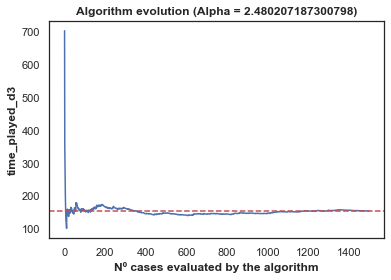

In [36]:
Plot_AlignRewards(Aligns_Best3, 0, Reward, Alpha, N = 1500)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

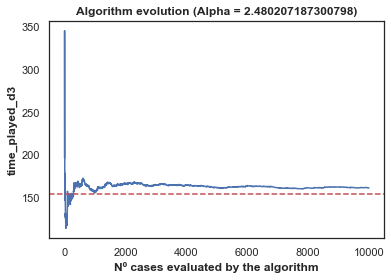

In [43]:
Plot_AlignRewards(Aligns_Best3, 5, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

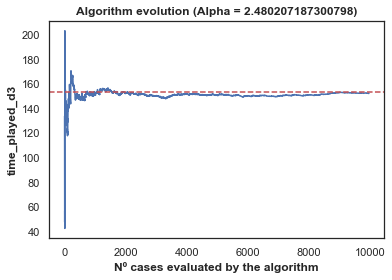

In [44]:
Plot_AlignRewards(Aligns_Best3, 2, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

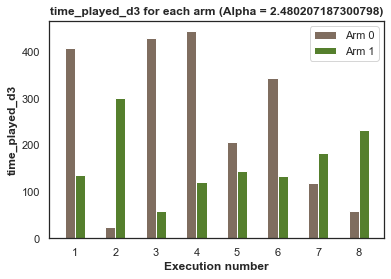

In [45]:
PerformanceArm2(Mean_RewardArms_Best3, Alpha, Reward)

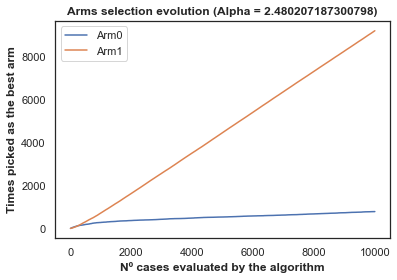

In [46]:
Plot_ArmsSelection(Paths_Best3, 0, Alpha)

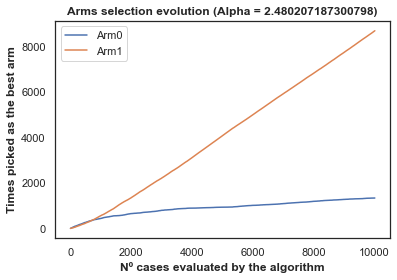

In [47]:
Plot_ArmsSelection(Paths_Best3, 5, Alpha)

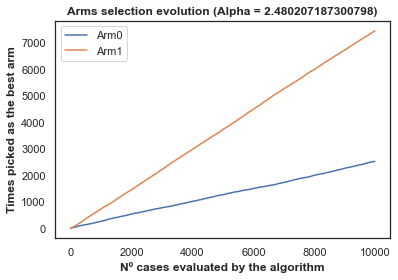

In [48]:
Plot_ArmsSelection(Paths_Best3, 2, Alpha)

Times each arm is chosen: [2631.125 7355.375]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 16.30270200387252
Proportion source_alias_source2 equals 0 for arm 1 is: 23.654066817906322


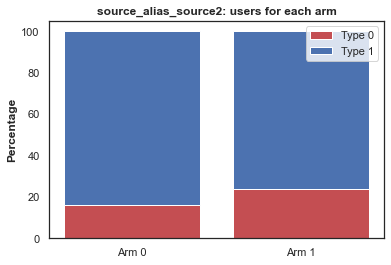

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 76.23227896725362
Proportion platform_alias_platform2 equals 0 for arm 1 is: 73.64268300146786


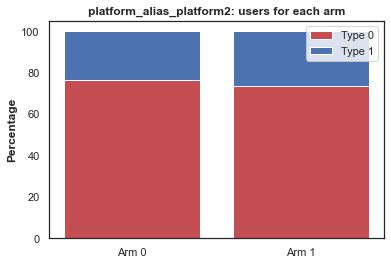

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.15813158 0.07543162 0.76643681]
Proportion country for arm 1 is: [0.32506499 0.18457449 0.49036053]


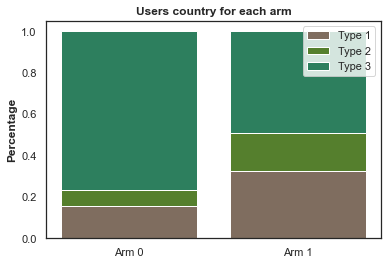

In [49]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3, Feat_Best3)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 84.18684218586546
Proportion country_alias_country_group1 equals 0 for arm 1 is: 67.49350129485234

Proportion country_alias_country_group2 equals 0 for arm 0 is: 92.45683839993936
Proportion country_alias_country_group2 equals 0 for arm 1 is: 81.54255141956233

Proportion country_alias_country_group3 equals 0 for arm 0 is: 23.356319414195195
Proportion country_alias_country_group3 equals 0 for arm 1 is: 50.963947285585334

Proportion platform_alias_platform2 equals 0 for arm 0 is: 76.23227896725362
Proportion platform_alias_platform2 equals 0 for arm 1 is: 73.64268300146786

Proportion source_alias_source2 equals 0 for arm 0 is: 16.30270200387252
Proportion source_alias_source2 equals 0 for arm 1 is: 23.654066817906322

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 32.95734065025353
Proportion return_d1 equals 0 for arm 1 is: 53.55275792

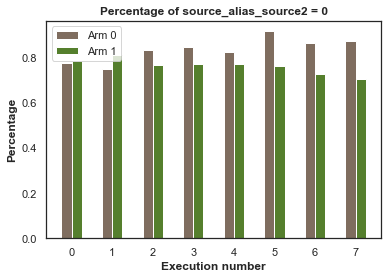

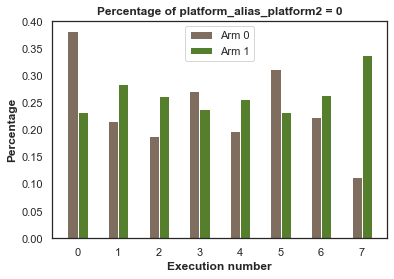

In [51]:
printFeatures2(Mark_Best3, Feat_Best3, Features)
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "platform_alias_platform2")

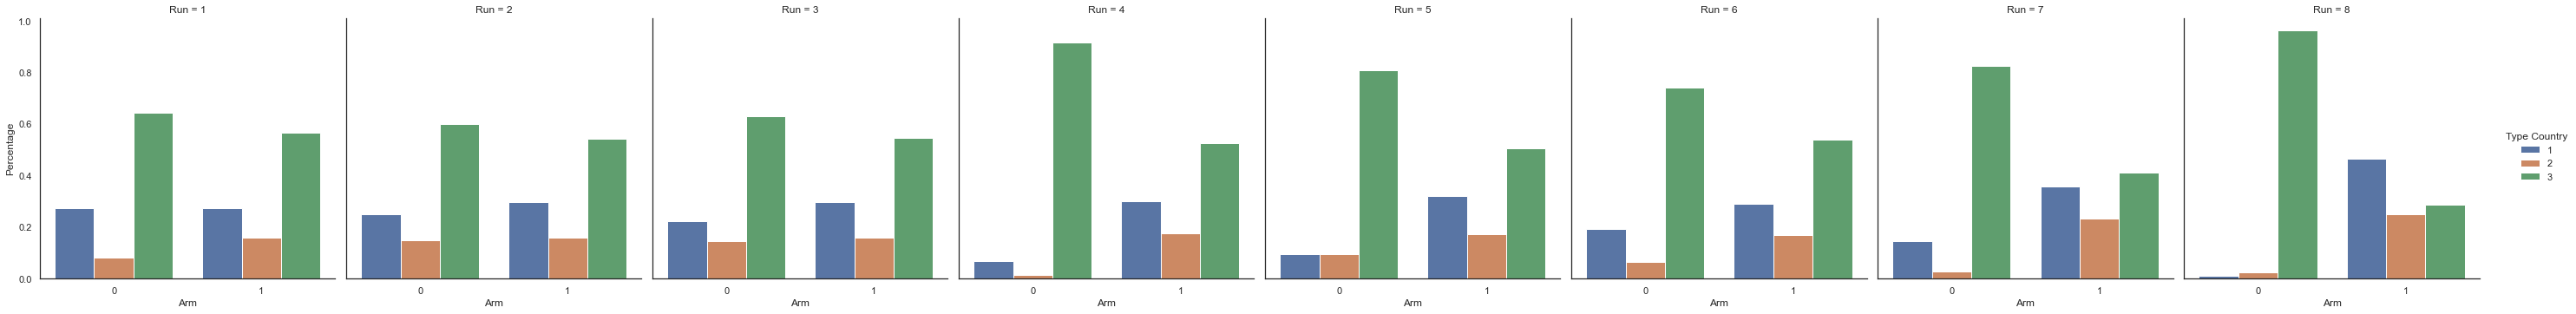

In [52]:
Country_8Runs(Feat_Best3)

#### Day 7

In [53]:
Reward = "time_played_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7, Paths_Best7, Aligns_Best7, Mean_Reward_Best7, Mean_RewardArms_Best7, Mark_Best7, Feat_Best7, Times_ArmChosen7 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  0%|▏                                                                             | 35/20000 [00:00<00:58, 342.78it/s]

Score to beat: 207.98473897389687
Parameters for following model:
	Reward: time_played_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 0.5


  0%|▏                                                                             | 44/20000 [00:00<00:46, 431.29it/s]

	Algorithm result is: 206.22388354402102
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1


  0%|▏                                                                             | 45/20000 [00:00<00:44, 449.66it/s]

	Algorithm result is: 205.40609593377408
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1.5


  0%|▏                                                                             | 45/20000 [00:00<00:44, 445.46it/s]

	Algorithm result is: 202.17288837921132
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2


  0%|▏                                                                             | 43/20000 [00:00<00:46, 429.58it/s]

	Algorithm result is: 205.19049696416693
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|▏                                                                             | 43/20000 [00:00<00:46, 429.50it/s]

	Algorithm result is: 202.8048905109436
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|▏                                                                             | 46/20000 [00:00<00:43, 455.05it/s]

	Algorithm result is: 205.76047401538762
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3


  0%|▏                                                                             | 43/20000 [00:00<00:46, 425.40it/s]

	Algorithm result is: 202.8768578335586
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:43<00:00, 454.87it/s]

	Algorithm result is: 204.12889374531454
	Score to beat is: 207.98473897389687


In [54]:
Results7

[206.22388354402102,
 205.40609593377408,
 202.17288837921132,
 205.19049696416693,
 202.8048905109436,
 205.76047401538762,
 202.8768578335586,
 204.12889374531454]

In [55]:
print("Best alpha is:", Alphas[Results7.index(np.max(Results7))])
Alpha = Alphas[Results7.index(np.max(Results7))]

Best alpha is: 0.5


In [56]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

202.87823531756464
213.1487575547576


In [57]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7))

Score to beat: 207.98473897389687
Algorithm score: 206.22388354402102


In [58]:
Mean_Reward_Best7

[202.5712757922116,
 217.69147144937,
 207.06640448077164,
 201.88462365595805,
 201.90564234179362]

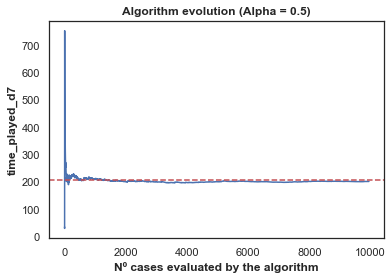

In [59]:
Plot_AlignRewards(Aligns_Best7, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

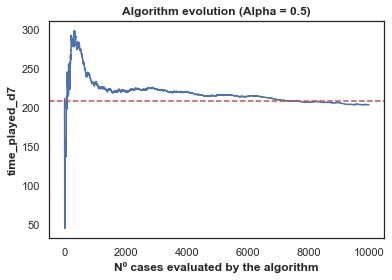

In [60]:
Plot_AlignRewards(Aligns_Best7, 1, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

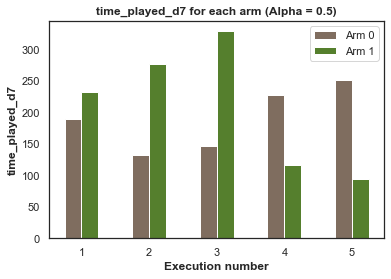

In [61]:
PerformanceArm2(Mean_RewardArms_Best7, Alpha, Reward)

In [62]:
Times_ArmChosen7

[[7302, 2651], [5072, 4910], [6284, 3911], [7762, 2132], [6952, 2957]]

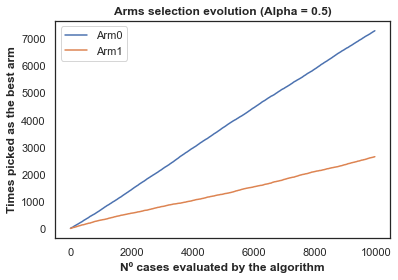

In [64]:
Plot_ArmsSelection(Paths_Best7, 0, Alpha)

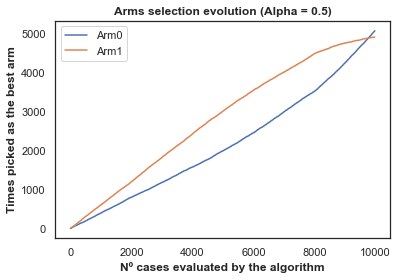

In [65]:
Plot_ArmsSelection(Paths_Best7, 1, Alpha)

Times each arm is chosen: [6674.4 3312.2]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 19.438981131157277
Proportion source_alias_source2 equals 0 for arm 1 is: 31.017390666392696


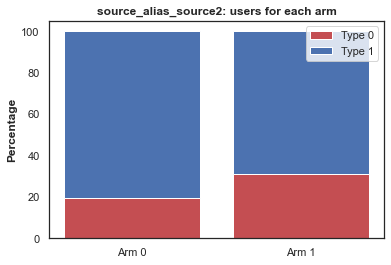

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 80.80413262216082
Proportion platform_alias_platform2 equals 0 for arm 1 is: 59.192027951009194


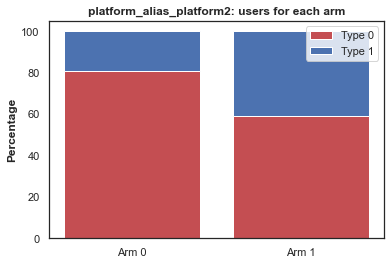

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.27416584 0.14979647 0.57603769]
Proportion country for arm 1 is: [0.35564732 0.16309034 0.48126234]


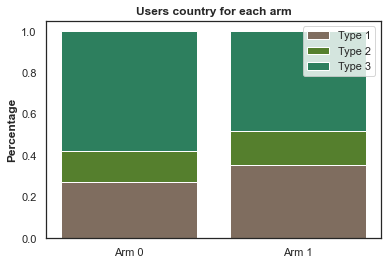

In [66]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7, Feat_Best7)

In [67]:
printFeatures2(Mark_Best7, Feat_Best7, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 72.58341597416711
Proportion country_alias_country_group1 equals 0 for arm 1 is: 64.43526831884603

Proportion country_alias_country_group2 equals 0 for arm 0 is: 85.02035278726744
Proportion country_alias_country_group2 equals 0 for arm 1 is: 83.69096592725589

Proportion country_alias_country_group3 equals 0 for arm 0 is: 42.39623123856546
Proportion country_alias_country_group3 equals 0 for arm 1 is: 51.87376575389809

Proportion platform_alias_platform2 equals 0 for arm 0 is: 80.80413262216082
Proportion platform_alias_platform2 equals 0 for arm 1 is: 59.192027951009194

Proportion source_alias_source2 equals 0 for arm 0 is: 19.438981131157277
Proportion source_alias_source2 equals 0 for arm 1 is: 31.017390666392696

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 57.06822998909844
Proportion return_d1 equals 0 for arm 1 is: 51.72633847

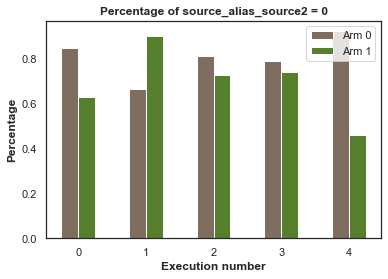

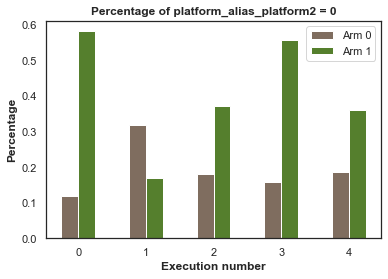

In [68]:
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "platform_alias_platform2")

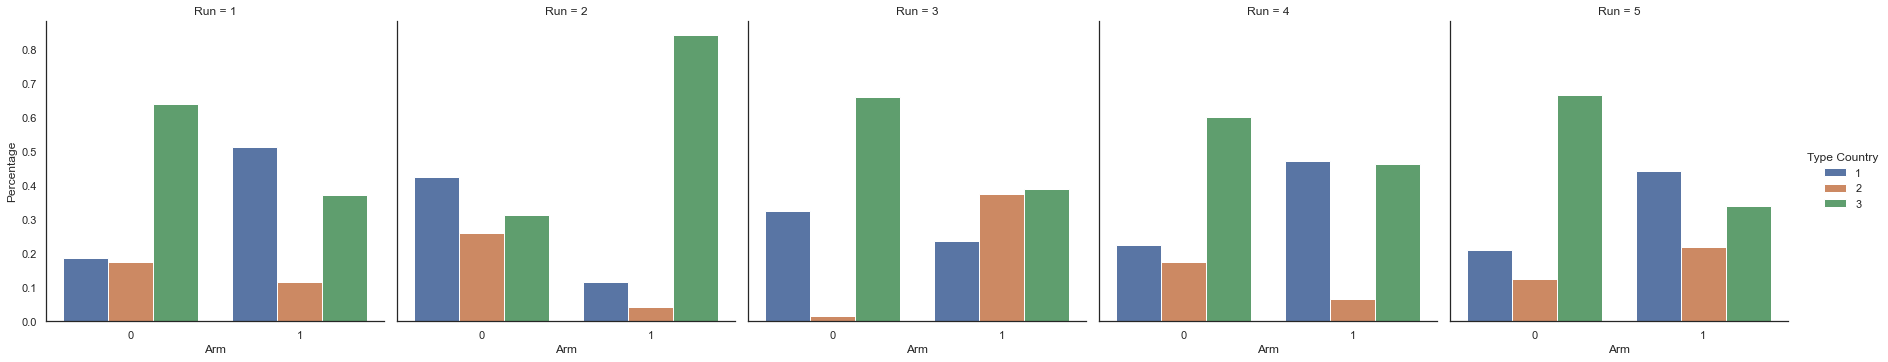

In [69]:
Country_5Runs(Feat_Best7)

#### Removing features

In [70]:
Reward = "time_played_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_aux1, Paths_Best7_aux1, Aligns_Best7_aux1, Mean_Reward_Best7_aux1, Mean_RewardArms_Best7_aux1, Mark_Best7_aux1, Feat_Best7_aux1, Times_ArmChosen7_aux1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

  0%|▏                                                                             | 50/20000 [00:00<00:39, 499.55it/s]

Score to beat: 207.98473897389687
Parameters for following model:
	Reward: time_played_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 0.5


  0%|▏                                                                             | 62/20000 [00:00<00:32, 613.86it/s]

	Algorithm result is: 213.88152490080992
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1


  0%|▏                                                                             | 56/20000 [00:00<00:35, 560.00it/s]

	Algorithm result is: 210.6550470231254
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1.5


  0%|▏                                                                             | 63/20000 [00:00<00:31, 629.80it/s]

	Algorithm result is: 208.57612294816948
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2


  0%|▎                                                                             | 68/20000 [00:00<00:29, 679.39it/s]

	Algorithm result is: 207.82459921356684
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|▎                                                                             | 66/20000 [00:00<00:30, 653.45it/s]

	Algorithm result is: 207.10482464396142
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|▏                                                                             | 53/20000 [00:00<00:37, 529.85it/s]

	Algorithm result is: 201.04512284067584
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3


  0%|▏                                                                             | 62/20000 [00:00<00:32, 613.26it/s]

	Algorithm result is: 213.1142292245524
	Score to beat is: 207.98473897389687
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 637.71it/s]

	Algorithm result is: 207.8725857666765
	Score to beat is: 207.98473897389687


In [71]:
Results7_aux1

[213.88152490080992,
 210.6550470231254,
 208.57612294816948,
 207.82459921356684,
 207.10482464396142,
 201.04512284067584,
 213.1142292245524,
 207.8725857666765]

In [72]:
print("Best alpha is:", Alphas[Results7_aux1.index(np.max(Results7_aux1))])
Alpha = Alphas[Results7_aux1.index(np.max(Results7_aux1))]

Best alpha is: 0.5


In [73]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

202.87823531756464
213.1487575547576


In [74]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_aux1))

Score to beat: 207.98473897389687
Algorithm score: 213.88152490080992


In [75]:
Mean_Reward_Best7_aux1

[214.3458287505621,
 211.9801596475156,
 213.7729846494795,
 215.87695546411405,
 213.43169599237845]

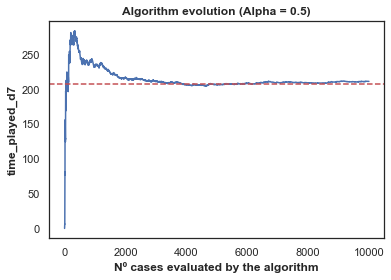

In [77]:
Plot_AlignRewards(Aligns_Best7_aux1, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

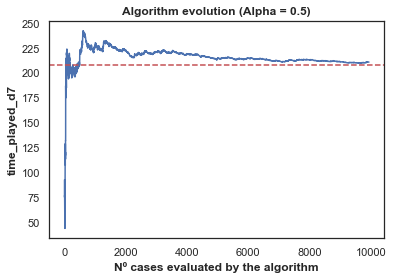

In [78]:
Plot_AlignRewards(Aligns_Best7_aux1, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

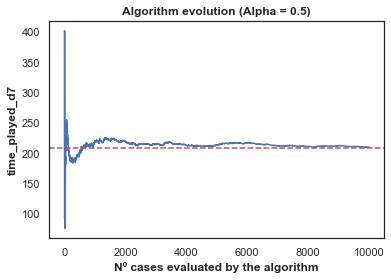

In [79]:
Plot_AlignRewards(Aligns_Best7_aux1, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

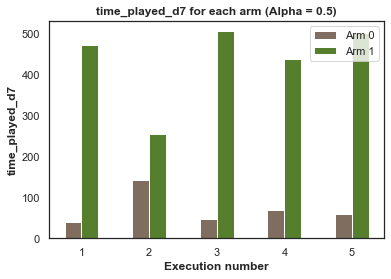

In [81]:
PerformanceArm2(Mean_RewardArms_Best7_aux1, Alpha, Reward)

In [82]:
Times_ArmChosen7_aux1

[[6014, 3993], [3586, 6393], [6477, 3587], [6133, 3809], [6594, 3437]]

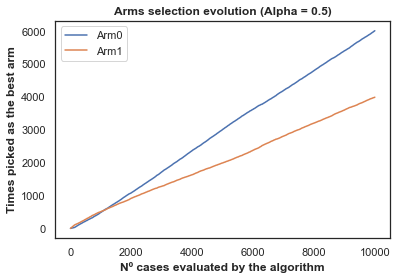

In [83]:
Plot_ArmsSelection(Paths_Best7_aux1, 0, Alpha)

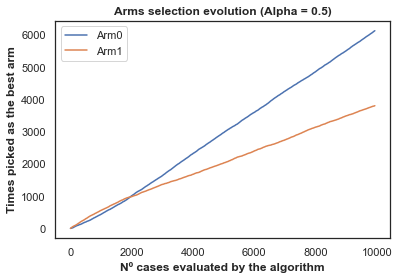

In [84]:
Plot_ArmsSelection(Paths_Best7_aux1, 3, Alpha)

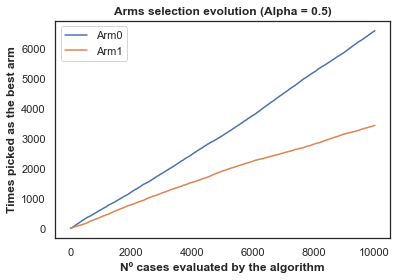

In [85]:
Plot_ArmsSelection(Paths_Best7_aux1, 4, Alpha)

Times each arm is chosen: [5760.8 4243.8]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 25.97705993126939
Proportion source_alias_source2 equals 0 for arm 1 is: 17.1590436100787


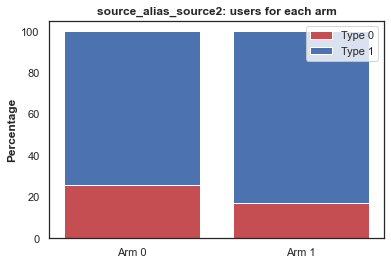

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 73.95057325107368
Proportion platform_alias_platform2 equals 0 for arm 1 is: 78.06933014445983


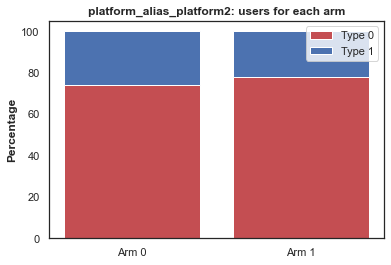

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.23518708 0.16010996 0.60470296]
Proportion country for arm 1 is: [0.29056471 0.1647363  0.54469899]


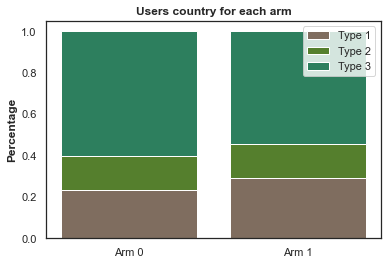

In [86]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_aux1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_aux1, Feat_Best7_aux1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_aux1, Feat_Best7_aux1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_aux1, Feat_Best7_aux1)

In [87]:
printFeatures2(Mark_Best7_aux1, Feat_Best7_aux1, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 76.48129227168164
Proportion country_alias_country_group1 equals 0 for arm 1 is: 70.94352879478171

Proportion country_alias_country_group2 equals 0 for arm 0 is: 83.9890040709367
Proportion country_alias_country_group2 equals 0 for arm 1 is: 83.52637028874635

Proportion country_alias_country_group3 equals 0 for arm 0 is: 39.52970365738167
Proportion country_alias_country_group3 equals 0 for arm 1 is: 45.530100916471945

Proportion platform_alias_platform2 equals 0 for arm 0 is: 73.95057325107368
Proportion platform_alias_platform2 equals 0 for arm 1 is: 78.06933014445983

Proportion source_alias_source2 equals 0 for arm 0 is: 25.97705993126939
Proportion source_alias_source2 equals 0 for arm 1 is: 17.1590436100787

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 75.60151859032858
Proportion return_d1 equals 0 for arm 1 is: 19.281250269831

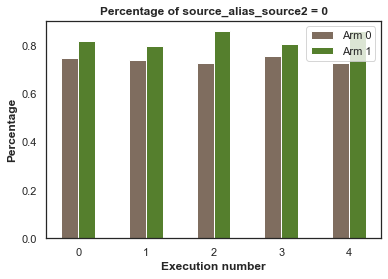

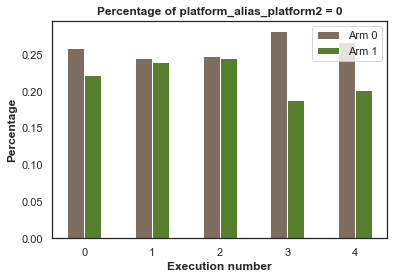

In [88]:
PlotFeaturesArm_2(Feat_Best7_aux1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7_aux1, Alpha, Reward = "platform_alias_platform2")

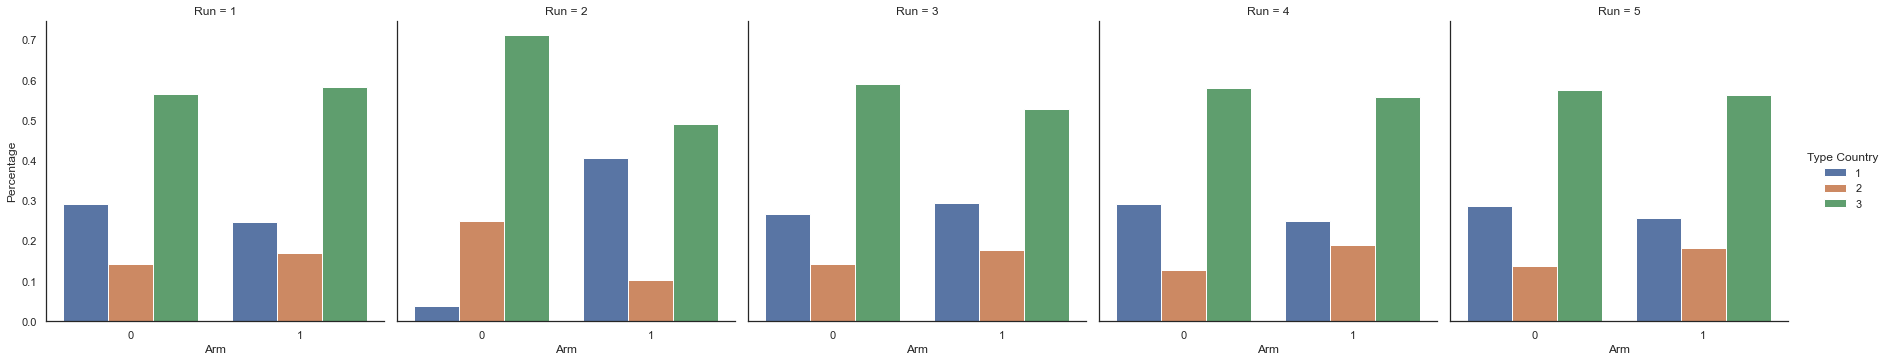

In [89]:
Country_5Runs(Feat_Best7_aux1)

### 4 Arms experiments

#### Day 1

In [90]:
Reward = "time_played_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results1_4, Paths_Best1_4, Aligns_Best1_4, Mean_Reward_Best1_4, Mean_RewardArms_Best1_4, Mark_Best1_4, Feat_Best1_4, Times_ArmChosen1_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|                                                                                | 8/50000 [00:00<17:16, 48.24it/s]

Score to beat: 54.079516951694664
Parameters for following model:
	Reward: time_played_d1
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 0.5


  0%|                                                                              | 32/50000 [00:00<02:40, 311.39it/s]

	Algorithm result is: 54.594862684254316
	Score to beat is: 54.079516951694664
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 1


  0%|                                                                              | 29/50000 [00:00<03:00, 277.41it/s]

	Algorithm result is: 53.91177461927161
	Score to beat is: 54.079516951694664
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 1.5


  0%|▏                                                                             | 98/50000 [00:00<00:51, 971.08it/s]

	Algorithm result is: 53.76660753574201
	Score to beat is: 54.079516951694664
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 2


  0%|▏                                                                             | 95/50000 [00:00<00:53, 940.52it/s]

	Algorithm result is: 54.26626670079465
	Score to beat is: 54.079516951694664
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 2.3581015157406195


  0%|▏                                                                             | 92/50000 [00:00<00:54, 911.00it/s]

	Algorithm result is: 53.92086398328481
	Score to beat is: 54.079516951694664
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 2.480207187300798


  0%|▏                                                                             | 96/50000 [00:00<00:51, 959.86it/s]

	Algorithm result is: 54.53002512944164
	Score to beat is: 54.079516951694664
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 3


  0%|▏                                                                           | 104/50000 [00:00<00:48, 1021.41it/s]

	Algorithm result is: 54.63112958483667
	Score to beat is: 54.079516951694664
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d1 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:54<00:00, 909.19it/s]

	Algorithm result is: 54.68287388506748
	Score to beat is: 54.079516951694664


In [94]:
Results1_4

[54.594862684254316,
 53.91177461927161,
 53.76660753574201,
 54.26626670079465,
 53.92086398328481,
 54.53002512944164,
 54.63112958483667,
 54.68287388506748]

In [95]:
print("Best alpha is:", Alphas[Results1_4.index(np.max(Results1_4))])
Alpha = Alphas[Results1_4.index(np.max(Results1_4))]

Best alpha is: 3.5


In [96]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

54.597313096694286
53.20667624635278


In [97]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1_4))

Score to beat: 54.079516951694664
Algorithm score: 54.68287388506748


In [98]:
Mean_Reward_Best1_4

[54.747927114999634,
 55.144037552360516,
 54.227247003930486,
 54.77584229203922,
 54.51931546200753]

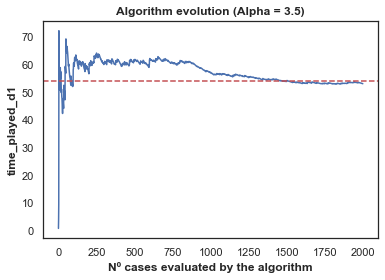

In [99]:
Plot_AlignRewards(Aligns_Best1_4, 0, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

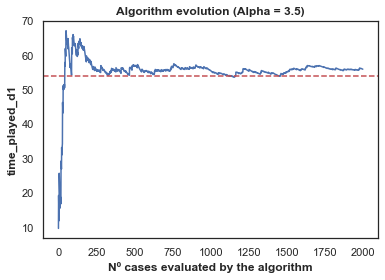

In [100]:
Plot_AlignRewards(Aligns_Best1_4, 1, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

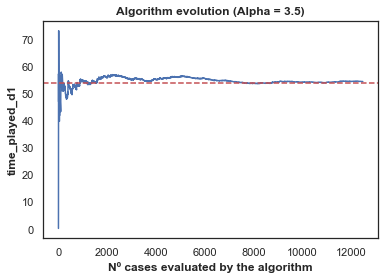

In [105]:
Plot_AlignRewards(Aligns_Best1_4, 3, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

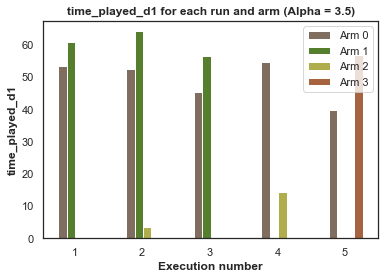

In [106]:
PerformanceArm4(Mean_RewardArms_Best1_4, Alpha, Reward)

In [107]:
Times_ArmChosen1_4

[[10980, 1487, 1, 2],
 [10983, 1494, 2, 1],
 [4187, 8302, 1, 1],
 [12472, 1, 6, 2],
 [2089, 1, 1, 10452]]

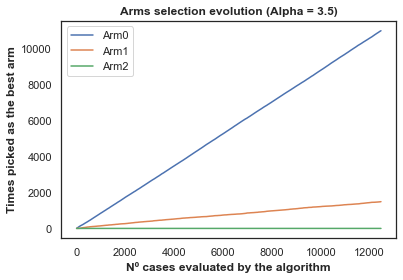

In [109]:
Plot_ArmsSelection(Paths_Best1_4, 0, Alpha)

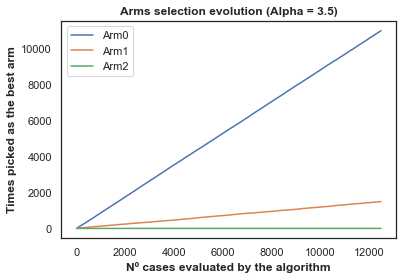

In [110]:
Plot_ArmsSelection(Paths_Best1_4, 1, Alpha)

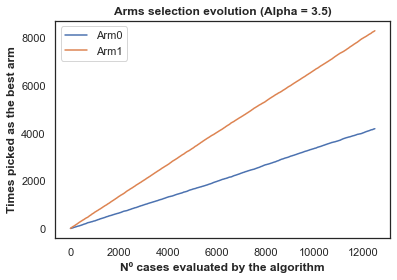

In [111]:
Plot_ArmsSelection(Paths_Best1_4, 2, Alpha)

In [112]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [8.1422e+03 2.2570e+03 2.2000e+00 2.0916e+03]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 53.70608126242755
Proportion source_alias_source2 equals 0 for arm 1 is: 83.4278874096646
Proportion source_alias_source2 equals 0 for arm 2 is: nan
Proportion source_alias_source2 equals 0 for arm 3 is: 97.37250023921156


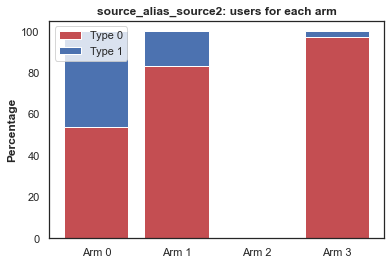

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 79.76657510249397
Proportion platform_alias_platform2 equals 0 for arm 1 is: 52.95581269672688
Proportion platform_alias_platform2 equals 0 for arm 2 is: nan
Proportion platform_alias_platform2 equals 0 for arm 3 is: 96.36972538513061


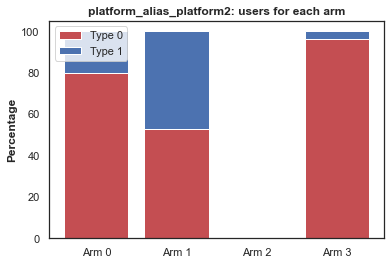

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



In [120]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
#Plot2_2arms(Mark_Best1_4, Feat_Best1_4)

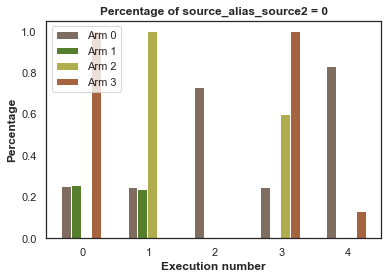

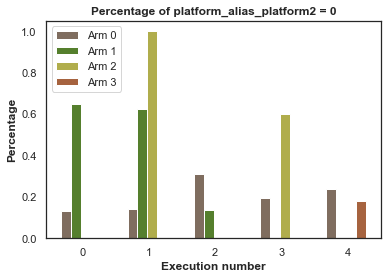

In [121]:
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "platform_alias_platform2")

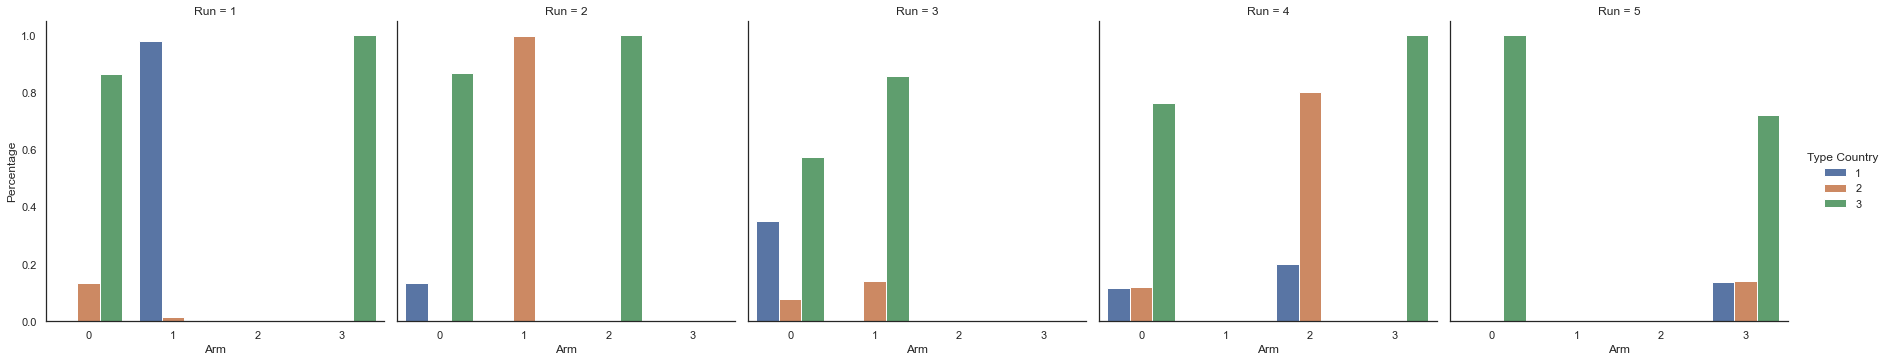

In [122]:
PlotFeaturesArm_4_Country5Runs(Feat_Best1_4)

#### Day 3

In [123]:
Reward = "time_played_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results3_4, Paths_Best3_4, Aligns_Best3_4, Mean_Reward_Best3_4, Mean_RewardArms_Best3_4, Mark_Best3_4, Feat_Best3_4, Times_ArmChosen3_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|                                                                              | 45/50000 [00:00<01:52, 445.52it/s]

Score to beat: 73.5780906090602
Parameters for following model:
	Reward: time_played_d3
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d3 RUNNING
Alpha equals: 0.5


 16%|███████████▊                                                                | 7797/50000 [00:15<01:26, 489.33it/s]


KeyboardInterrupt: 

In [124]:
Results3_4

[71.9467975316501,
 74.7624528160296,
 75.7735717456252,
 74.63042157213172,
 73.1111412048122,
 72.8664942354762,
 73.21061663785095,
 74.37917412767035]

In [125]:
print("Best alpha is:", Alphas[Results3_4.index(np.max(Results3_4))])
Alpha = Alphas[Results3_4.index(np.max(Results3_4))]

Best alpha is: 1.5


In [126]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

74.54623106541382
72.2971663493459


In [127]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3_4))

Score to beat: 73.5780906090602
Algorithm score: 75.7735717456252


In [128]:
Mean_Reward_Best3_4

[76.53321307231862,
 76.2342653915999,
 72.93914694908383,
 77.02654977647498,
 76.13468353864867]

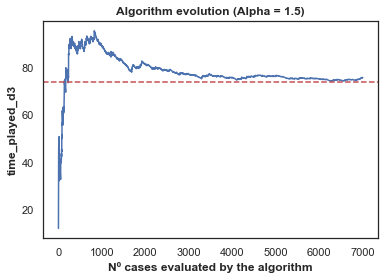

In [129]:
Plot_AlignRewards(Aligns_Best3_4, 0, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

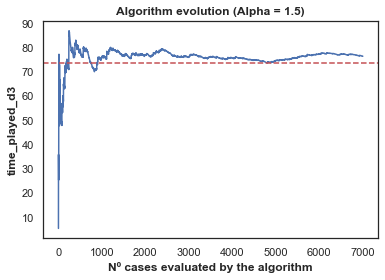

In [130]:
Plot_AlignRewards(Aligns_Best3_4, 1, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

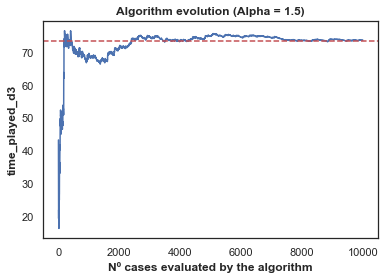

In [132]:
Plot_AlignRewards(Aligns_Best3_4, 2, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

In [133]:
Times_ArmChosen3_4

[[1192, 2225, 6382, 2629],
 [7371, 1547, 1150, 2442],
 [2670, 1507, 5573, 2964],
 [6178, 3000, 2724, 552],
 [2471, 5096, 3087, 1805]]

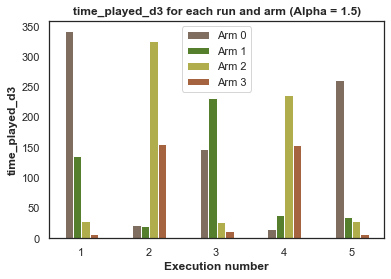

In [134]:
PerformanceArm4(Mean_RewardArms_Best3_4, Alpha, Reward)

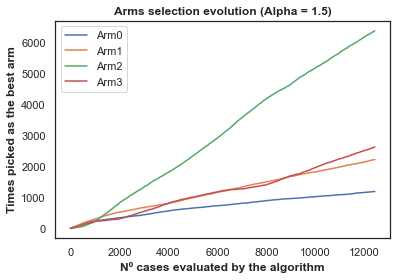

In [135]:
Plot_ArmsSelection(Paths_Best3_4, 0, Alpha)

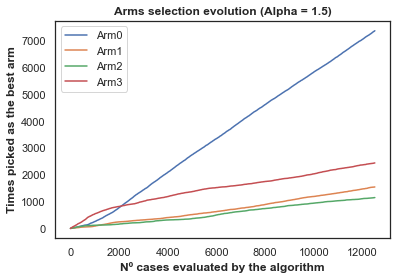

In [136]:
Plot_ArmsSelection(Paths_Best3_4, 1, Alpha)

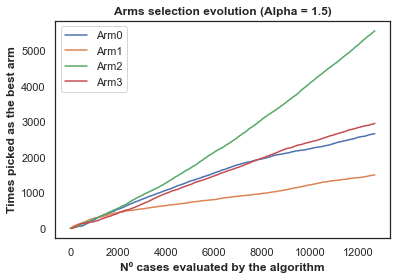

In [137]:
Plot_ArmsSelection(Paths_Best3_4, 2, Alpha)

In [138]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [3976.4 2675.  3783.2 2078.4]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 79.62642482454802
Proportion source_alias_source2 equals 0 for arm 1 is: 70.81490165363266
Proportion source_alias_source2 equals 0 for arm 2 is: 70.34008958459901
Proportion source_alias_source2 equals 0 for arm 3 is: 83.5718426009741


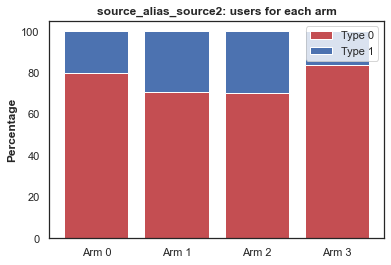

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 76.84653283291848
Proportion platform_alias_platform2 equals 0 for arm 1 is: 67.52315655219573
Proportion platform_alias_platform2 equals 0 for arm 2 is: 75.90410884941552
Proportion platform_alias_platform2 equals 0 for arm 3 is: 85.52506724131193


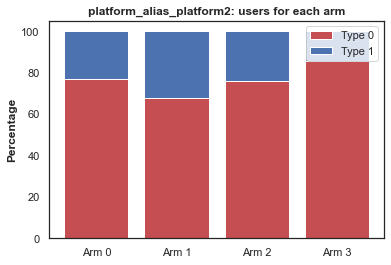

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.15096905 0.12181036 0.72722059]
Proportion country for arm 1 is: [0.16160546 0.18344083 0.65495371]
Proportion country for arm 2 is: [0.15229122 0.10706675 0.74064203]
Proportion country for arm 3 is: [0.11010896 0.22064712 0.66924392]


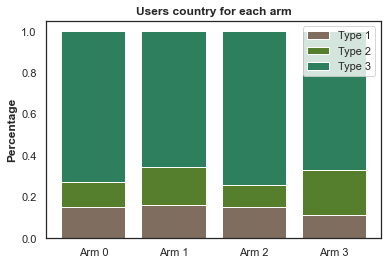

In [139]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3_4, Feat_Best3_4)

In [140]:
printFeatures2(Mark_Best3_4, Feat_Best3_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 84.90309456301608
Proportion country_alias_country_group1 equals 0 for arm 1 is: 83.83945439322869
Proportion country_alias_country_group1 equals 0 for arm 2 is: 84.77087824483095
Proportion country_alias_country_group1 equals 0 for arm 3 is: 88.98910387460441

Proportion country_alias_country_group2 equals 0 for arm 0 is: 87.81896449199618
Proportion country_alias_country_group2 equals 0 for arm 1 is: 81.65591707378888
Proportion country_alias_country_group2 equals 0 for arm 2 is: 89.29332492905824
Proportion country_alias_country_group2 equals 0 for arm 3 is: 77.93528845348844

Proportion country_alias_country_group3 equals 0 for arm 0 is: 27.277940944987733
Proportion country_alias_country_group3 equals 0 for arm 1 is: 34.50462853298242
Proportion country_alias_country_group3 equals 0 for arm 2 is: 25.935796826110803
Proportion country_alias_country_group3 equals 0 for arm 3 is: 33.07560767190716

Proportion platform_ali

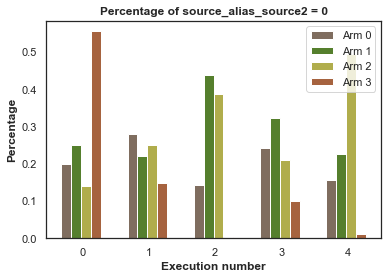

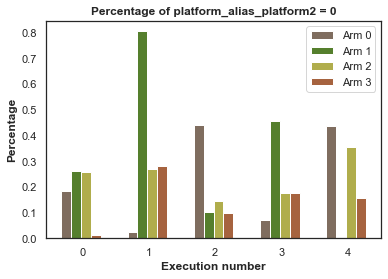

In [141]:
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "platform_alias_platform2")

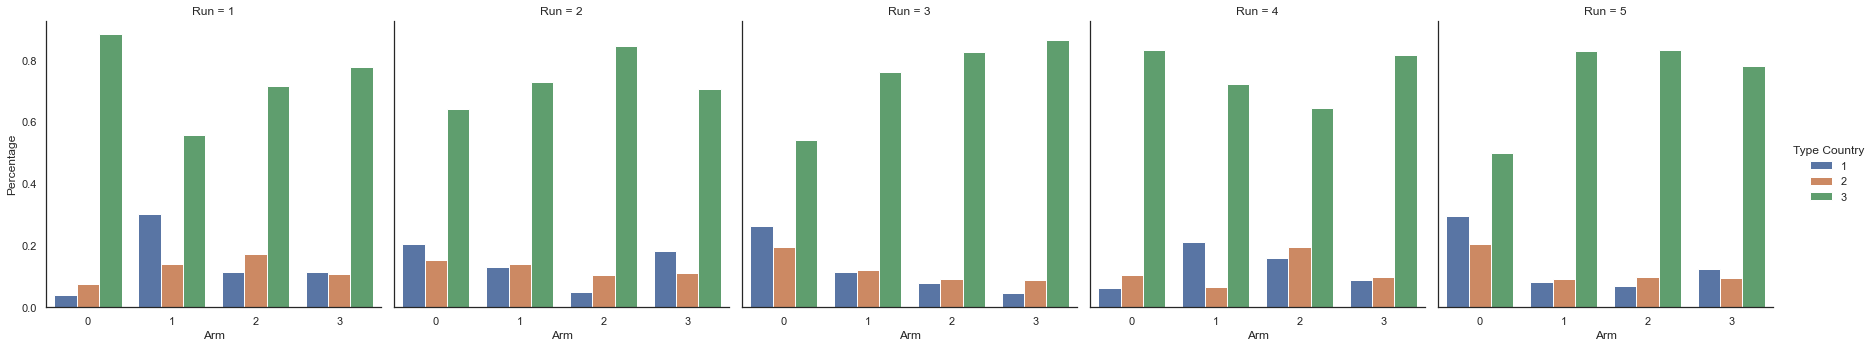

In [203]:
PlotFeaturesArm_4_Country5Runs(Feat_Best3_4)

#### Day 7

In [143]:
Reward = "time_played_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_4, Paths_Best7_4, Aligns_Best7_4, Mean_Reward_Best7_4, Mean_RewardArms_Best7_4, Mark_Best7_4, Feat_Best7_4, Times_ArmChosen7_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|                                                                              | 34/50000 [00:00<02:30, 333.09it/s]

Score to beat: 98.5783000300023
Parameters for following model:
	Reward: time_played_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 0.5


  0%|                                                                              | 33/50000 [00:00<02:32, 326.72it/s]

	Algorithm result is: 97.82868398132814
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1


  0%|                                                                              | 34/50000 [00:00<02:27, 339.69it/s]

	Algorithm result is: 97.09615206876694
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1.5


  0%|                                                                              | 36/50000 [00:00<02:18, 359.76it/s]

	Algorithm result is: 96.39725003016432
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2


  0%|                                                                              | 36/50000 [00:00<02:21, 353.27it/s]

	Algorithm result is: 96.27603742119999
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|                                                                              | 38/50000 [00:00<02:12, 376.17it/s]

	Algorithm result is: 97.62487043974447
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|                                                                              | 39/50000 [00:00<02:10, 382.35it/s]

	Algorithm result is: 98.87942184604667
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3


  0%|                                                                              | 36/50000 [00:00<02:20, 356.51it/s]

	Algorithm result is: 98.56347152555445
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:15<00:00, 368.51it/s]

	Algorithm result is: 100.39782318570482
	Score to beat is: 98.5783000300023


In [184]:
Results7_4

[97.82868398132814,
 97.09615206876694,
 96.39725003016432,
 96.27603742119999,
 97.62487043974447,
 98.87942184604667,
 98.56347152555445,
 100.39782318570482]

In [185]:
print("Best alpha is:", Alphas[Results7_4.index(np.max(Results7_4))])
Alpha = Alphas[Results7_4.index(np.max(Results7_4))]

Best alpha is: 3.5


In [186]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

99.86116159692887
97.37108065503006


In [187]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4))

Score to beat: 98.5783000300023
Algorithm score: 100.39782318570482


In [188]:
Mean_Reward_Best7_4

[105.18940581280327,
 99.34086614337419,
 99.68338890672992,
 100.50357887264576,
 97.27187619297106]

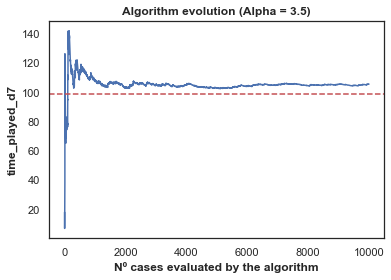

In [189]:
Plot_AlignRewards(Aligns_Best7_4, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

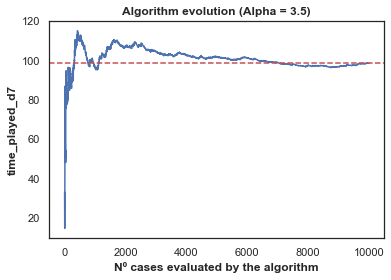

In [190]:
Plot_AlignRewards(Aligns_Best7_4, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

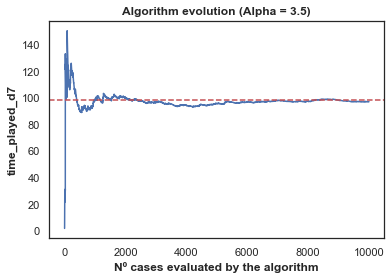

In [191]:
Plot_AlignRewards(Aligns_Best7_4, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

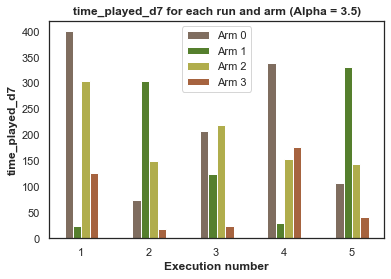

In [192]:
PerformanceArm4(Mean_RewardArms_Best7_4, Alpha, Reward)

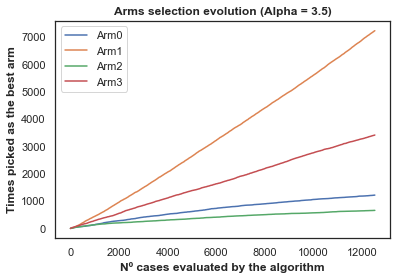

In [193]:
Plot_ArmsSelection(Paths_Best7_4, 0, Alpha)

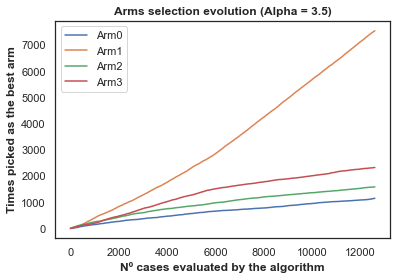

In [194]:
Plot_ArmsSelection(Paths_Best7_4, 3, Alpha)

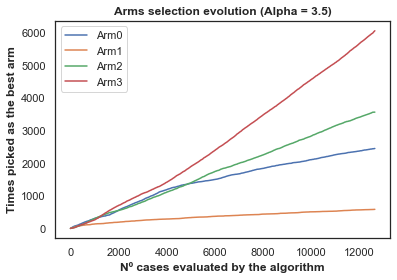

In [195]:
Plot_ArmsSelection(Paths_Best7_4, 4, Alpha)

In [196]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [2032.6 3928.6 1819.  4754.6]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 76.47275606262825
Proportion source_alias_source2 equals 0 for arm 1 is: 85.37287626372972
Proportion source_alias_source2 equals 0 for arm 2 is: 68.72609182700987
Proportion source_alias_source2 equals 0 for arm 3 is: 70.12537802501681


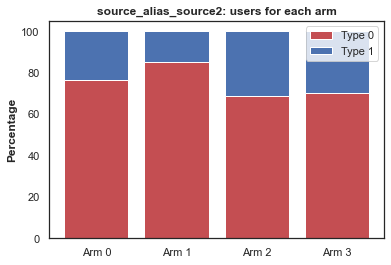

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 66.32312536827848
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.21671091459643
Proportion platform_alias_platform2 equals 0 for arm 2 is: 67.77454665735145
Proportion platform_alias_platform2 equals 0 for arm 3 is: 81.31237529590982


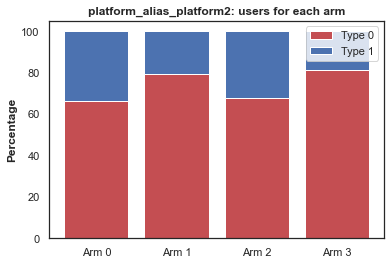

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.07161211 0.27288549 0.6555024 ]
Proportion country for arm 1 is: [0.14240521 0.11065823 0.74693656]
Proportion country for arm 2 is: [0.21940732 0.2219703  0.55862238]
Proportion country for arm 3 is: [0.11876828 0.06824392 0.8129878 ]


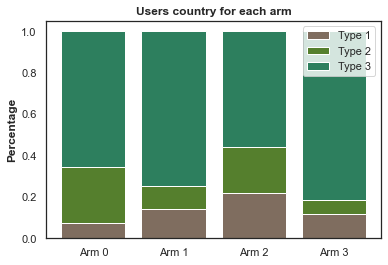

In [197]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4, Feat_Best7_4)

In [198]:
printFeatures2(Mark_Best7_4, Feat_Best7_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 92.83878888032282
Proportion country_alias_country_group1 equals 0 for arm 1 is: 85.75947911009895
Proportion country_alias_country_group1 equals 0 for arm 2 is: 78.05926827662867
Proportion country_alias_country_group1 equals 0 for arm 3 is: 88.12317195598581

Proportion country_alias_country_group2 equals 0 for arm 0 is: 72.71145089043173
Proportion country_alias_country_group2 equals 0 for arm 1 is: 88.93417667067575
Proportion country_alias_country_group2 equals 0 for arm 2 is: 77.80296988677009
Proportion country_alias_country_group2 equals 0 for arm 3 is: 93.17560781944817

Proportion country_alias_country_group3 equals 0 for arm 0 is: 34.449760229245435
Proportion country_alias_country_group3 equals 0 for arm 1 is: 25.306344219225274
Proportion country_alias_country_group3 equals 0 for arm 2 is: 44.13776183660124
Proportion country_alias_country_group3 equals 0 for arm 3 is: 18.701220224566033

Proportion platform_al

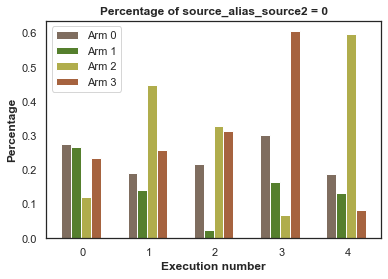

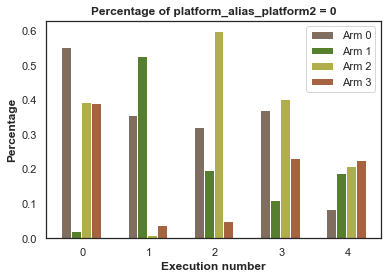

In [199]:
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "platform_alias_platform2")

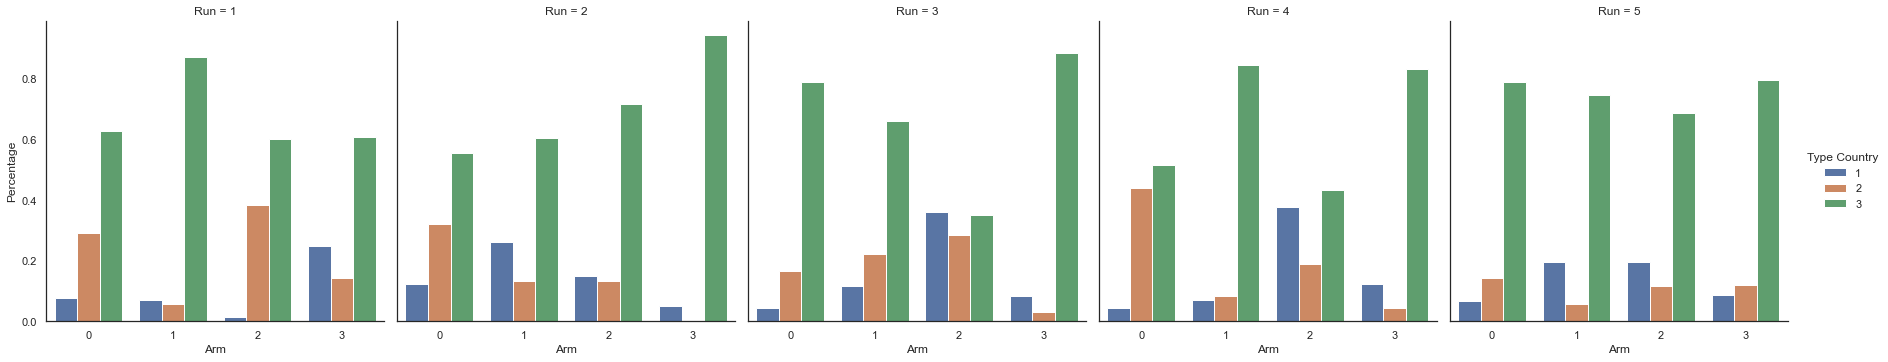

In [200]:
PlotFeaturesArm_4_Country5Runs(Feat_Best7_4)

#### Test removing features

In [145]:
Reward = "time_played_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 4

Results7_4_aux2, Paths_Best7_4_aux2, Aligns_Best7_4_aux2, Mean_Reward_Best7_4_aux2, Mean_RewardArms_Best7_4_aux2, Mark_Best7_4_aux2, Feat_Best7_4_aux2, Times_ArmChosen7_4_aux2 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

  0%|                                                                              | 50/50000 [00:00<01:39, 499.83it/s]

Score to beat: 98.5783000300023
Parameters for following model:
	Reward: time_played_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 0.5


  0%|                                                                              | 50/50000 [00:00<01:41, 491.81it/s]

	Algorithm result is: 100.51644648260952
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1


  0%|                                                                              | 47/50000 [00:00<01:51, 447.99it/s]

	Algorithm result is: 98.4980962412837
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 1.5


  0%|                                                                              | 45/50000 [00:00<01:51, 449.82it/s]

	Algorithm result is: 96.47593673789174
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2


  0%|                                                                              | 56/50000 [00:00<01:30, 554.00it/s]

	Algorithm result is: 101.33072257757095
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.3581015157406195


  0%|                                                                              | 51/50000 [00:00<01:38, 507.71it/s]

	Algorithm result is: 97.38547309197295
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 2.480207187300798


  0%|                                                                              | 53/50000 [00:00<01:35, 524.92it/s]

	Algorithm result is: 98.00735689134072
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3


  0%|                                                                              | 50/50000 [00:00<01:39, 499.75it/s]

	Algorithm result is: 98.25565245595462
	Score to beat is: 98.5783000300023
EVALUATION WITH DIFFERENT ALPHAS FOR time_played_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:37<00:00, 511.61it/s]

	Algorithm result is: 98.94115386634186
	Score to beat is: 98.5783000300023


In [163]:
Results7_4_aux2

[100.51644648260952,
 98.4980962412837,
 96.47593673789174,
 101.33072257757095,
 97.38547309197295,
 98.00735689134072,
 98.25565245595462,
 98.94115386634186]

In [164]:
print("Best alpha is:", Alphas[Results7_4_aux2.index(np.max(Results7_4_aux2))])
Alpha = Alphas[Results7_4_aux2.index(np.max(Results7_4_aux2))]

Best alpha is: 2


In [165]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

99.86116159692887
97.37108065503006


In [166]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4_aux2))

Score to beat: 98.5783000300023
Algorithm score: 101.33072257757095


In [167]:
Mean_Reward_Best7_4_aux2

[104.59184291876919, 106.18997781463433, 98.42863171245486, 96.11243786442546]

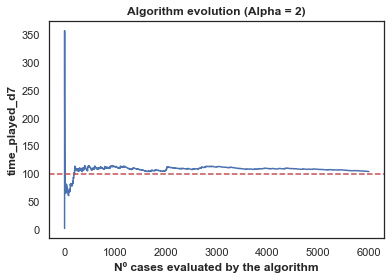

In [170]:
Plot_AlignRewards(Aligns_Best7_4_aux2, 0, Reward, Alpha, N = 6000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

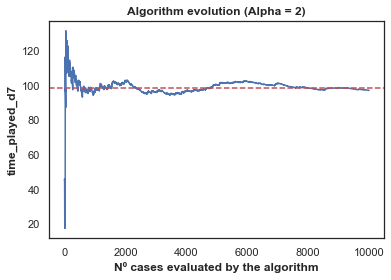

In [171]:
Plot_AlignRewards(Aligns_Best7_4_aux2, 2, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

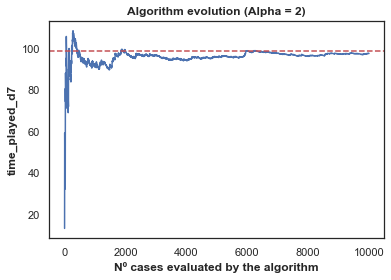

In [172]:
Plot_AlignRewards(Aligns_Best7_4_aux2, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

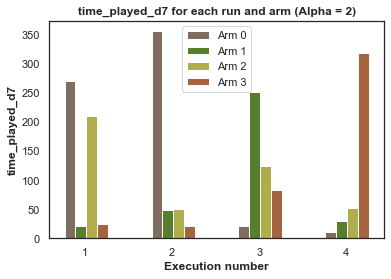

In [173]:
PerformanceArm4(Mean_RewardArms_Best7_4_aux2, Alpha, Reward)

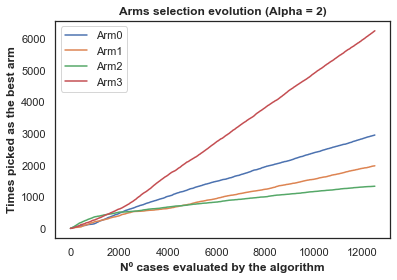

In [174]:
Plot_ArmsSelection(Paths_Best7_4_aux2, 0, Alpha)

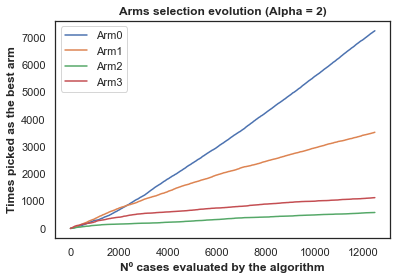

In [175]:
Plot_ArmsSelection(Paths_Best7_4_aux2, 2, Alpha)

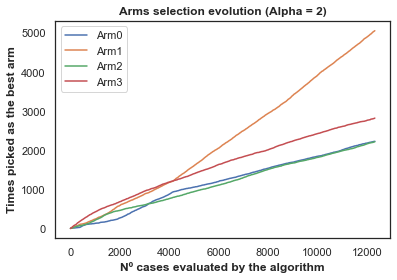

In [176]:
Plot_ArmsSelection(Paths_Best7_4_aux2, 3, Alpha)

In [177]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [3713.75 3864.5  1415.   3463.75]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 66.09864553225793
Proportion source_alias_source2 equals 0 for arm 1 is: 67.85985628949588
Proportion source_alias_source2 equals 0 for arm 2 is: 80.96581556481858
Proportion source_alias_source2 equals 0 for arm 3 is: 74.31468246630061


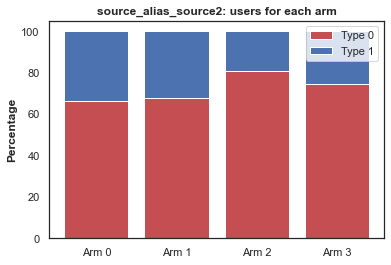

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 66.32312536827848
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.21671091459643
Proportion platform_alias_platform2 equals 0 for arm 2 is: 67.77454665735145
Proportion platform_alias_platform2 equals 0 for arm 3 is: 81.31237529590982


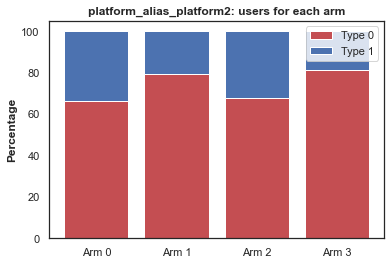

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.11685976 0.12697125 0.75616899]
Proportion country for arm 1 is: [0.14424069 0.09515874 0.76060057]
Proportion country for arm 2 is: [0.23304818 0.22755378 0.53939804]
Proportion country for arm 3 is: [0.07707061 0.08990288 0.83302651]


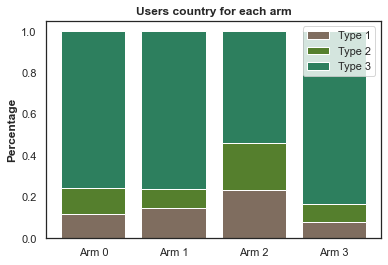

In [178]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4_aux2, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4_aux2, Feat_Best7_4_aux2)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4_aux2, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4_aux2, Feat_Best7_4_aux2)

In [179]:
printFeatures2(Mark_Best7_4_aux2, Feat_Best7_4_aux2, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 88.31402397974209
Proportion country_alias_country_group1 equals 0 for arm 1 is: 85.57593072941847
Proportion country_alias_country_group1 equals 0 for arm 2 is: 76.69518184576758
Proportion country_alias_country_group1 equals 0 for arm 3 is: 92.29293911062979

Proportion country_alias_country_group2 equals 0 for arm 0 is: 87.30287458711695
Proportion country_alias_country_group2 equals 0 for arm 1 is: 90.48412587987062
Proportion country_alias_country_group2 equals 0 for arm 2 is: 77.24462221143821
Proportion country_alias_country_group2 equals 0 for arm 3 is: 91.00971178283602

Proportion country_alias_country_group3 equals 0 for arm 0 is: 24.38310143314097
Proportion country_alias_country_group3 equals 0 for arm 1 is: 23.939943390710912
Proportion country_alias_country_group3 equals 0 for arm 2 is: 46.060195942794216
Proportion country_alias_country_group3 equals 0 for arm 3 is: 16.697349106534183

Proportion platform_al

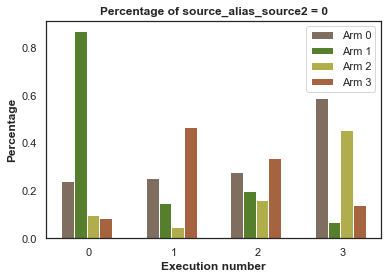

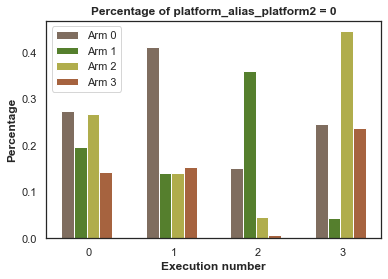

In [180]:
PlotFeaturesArm_4(Feat_Best7_4_aux2, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4_aux2, Alpha, Reward = "platform_alias_platform2")

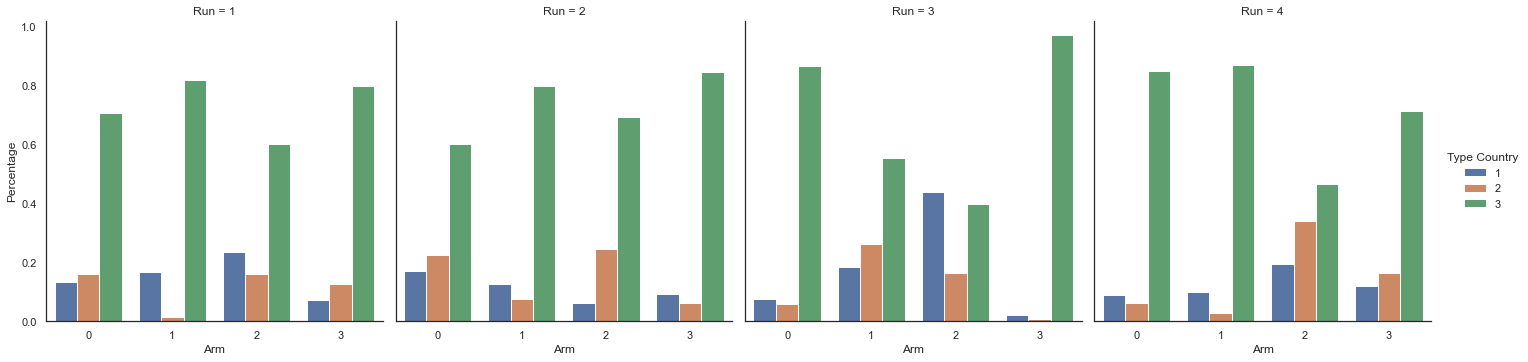

In [182]:
PlotFeaturesArm_4_Country4Runs(Feat_Best7_4_aux2)